In [ ]:
"""
This notebook builds a small Monte Carlo programm to create data of the exact cover problem.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [214]:
class MC_EC3:
    # This is a class for the exact cover 3 problem. 
    
    def __init__(self, num_spins):
        # Construct an instance with num_spins of desired spins.
        self.num_spins = num_spins
        self.hamiltonian_diag = 100*np.ones(2**num_spins)
    
    def random_clauses(self, num_clauses):
        # Sample num_clauses random clauses.
        self.num_clauses = num_clauses
        clauses = np.zeros((self.num_spins, 3), dtype=int)
        for i in range(self.num_spins):
            # Sample three spin indices.
            clauses[i] = np.random.choice(np.arange(self.num_spins), 3, replace=False)
        self.clauses = clauses
        
    def initial_state(self):
        # States contain 1, -1 spin orientations.
        self.state = (-1)**np.random.randint(0, 2, self.num_spins)
        
    def classic_energy(self, state):
        # Construct classical Hamiltonian from given state and clauses.
        energy = 0
        for i in range(self.num_clauses):
            energy += (state[self.clauses[i]].sum() - 1)**2
        return energy
    
    def flip_spin_proposal(self, ind_spin):
        # Propose energy and state of a single spin flip.
        neg_mat = np.ones(self.num_spins)
        neg_mat[ind_spin] *= -1
        proposed_state = neg_mat * self.state
        
        return self.classic_energy(proposed_state), proposed_state
        
    def mc_run(self, temperature):
        # Perform single MC run.
        rand_spin = np.random.randint(0, self.num_spins, 1)
        current_energy = self.classic_energy(self.state)
        proposal = self.flip_spin_proposal(rand_spin)
        delta_energy = proposal[0] - current_energy
        p = np.random.rand()
        if delta_energy < 0 or p < np.exp( - delta_energy / temperature):
            self.state[rand_spin] = - self.state[rand_spin]
        self.hamiltonian_diag[self.binary_encode(proposal[1])] = proposal[0]
    
    def mc_loop(self, num_runs, temperature, callback):
        # Loop over MC runs.
        energies = np.zeros(num_runs)
        for i in range(num_runs):
            self.mc_run(temperature)
            if callback == 'energy':
                energies[i] = self.classic_energy(self.state)
        if callback == 'energy':
            return energies
        
    def binary_encode(self, state):
        # Representation of the state in the 2 basis.
        zero_one_rep = (1 + state)/2
        two_basis = 2**np.arange(self.num_spins)
        return np.sum(zero_one_rep * two_basis, dtype=int)

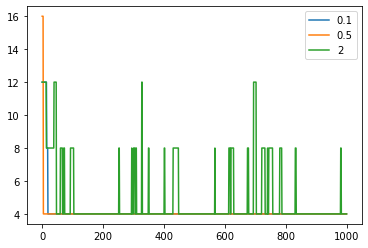

In [215]:
for temperature in [.1,.5,2]:
    mc_ec3 = MC_EC3(7)
    mc_ec3.random_clauses(7)
    mc_ec3.initial_state()
    plt.plot(mc_ec3.mc_loop(1000, temperature, 'energy'), label=temperature)
plt.legend()

In [220]:
mc_ec3.mc_loop(100000, 5, 'energy')

array([ 4., 12., 12., ...,  8.,  8.,  8.])

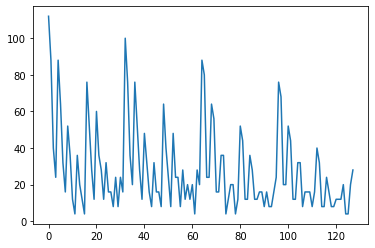

In [221]:
plt.plot(mc_ec3.hamiltonian_diag)